# Batch image processing using Python

There are severale ways to deal with images in Python, resonable choices are [numpy](https://numpy.org/), [scikit-image](https://scikit-image.org/) or [Pillow](https://pillow.readthedocs.io/en/stable/).
Here in this tutorial we will use __Pillow__.

__Setup__

In [1]:
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

## Get a set of images from google (optional)
We use code provided here: https://github.com/hardikvasa/google-images-download

__Setting__

In [2]:
search_term = "beiersdorf"
arguments = {
    "keywords": search_term,
    "limit": 15,
    "size" : '>800*600',
    "print_urls": True,
    "output_directory": '../data/images',
    'format' : 'png'
        }

In [3]:
from google_images_download import google_images_download   # importing the library
response = google_images_download.googleimagesdownload()   # class instantiation

# uncomment to download images
#paths = response.download(arguments)   # passing the arguments to the function

## Open an image

In [4]:
!ls ../data/images/{search_term}/

1.Product-Range-Large-Stage-Teaser.png
10.2000px-Beiersdorf_Logo.svg.png
11.Beiersdorf-Factsheet-2018-de.png
12.Sortiment-1880x1058-Beiersdorf.png
13.Strong-Brands-Homestage-Beiersdorf.png
14.Beiersdorf-stefan-de-loecker-und-christian-dahl.png
15.2000px-Beiersdorf_CI_%28white_on_blue%29.svg.png
2.Product-Range-Small-teaser-home-padding.png
3.Beiersdorf-skin-stories-logo-teaser-2019.png
4.Beiersdorf-Weltkarte-Beiersdorf.png
5.Beiersdorf-cent-initative-2019.png
6.35325395-15165478940958765_origin.png
7.1280px-Beiersdorf.svg.png
8.beiersdorf.png
9.Beiersdorf-good-logo.png
example.png


In [5]:
p = Path(f'../data/images/beiersdorf/example.png')

In [6]:
img = Image.open(p) 

## Image properties

In [7]:
print(img.format)
print()
print(img.size)
print(img.width)
print(img.height)

PNG

(940, 529)
940
529


In [8]:
img.format

'PNG'

In [9]:
img.mode

'RGBA'

In [10]:
img.size

(940, 529)

In [11]:
print(f'Width: {img.width}, Height: {img.height}')

Width: 940, Height: 529


## Plot image

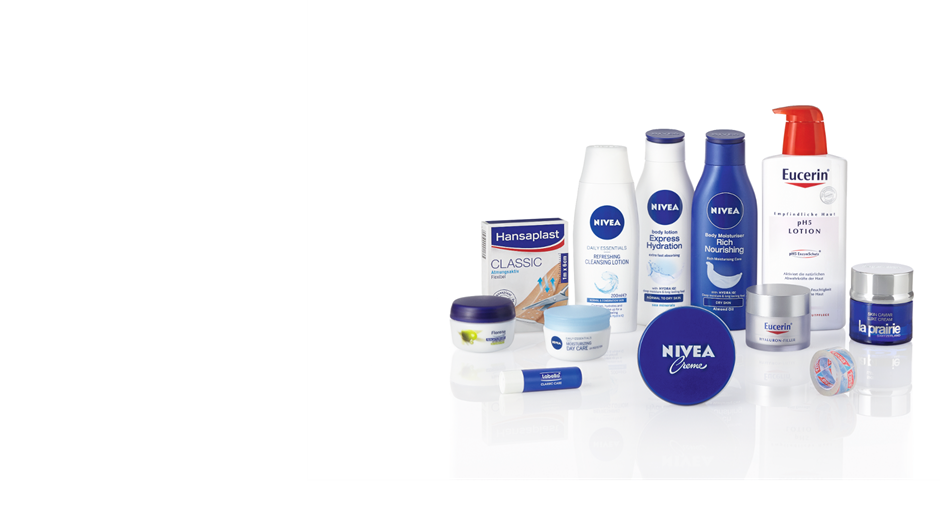

In [12]:
img

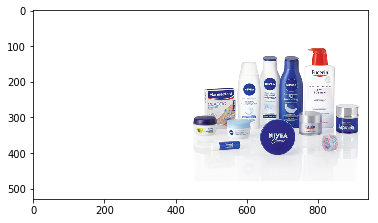

In [13]:
plt.imshow(img)

## Image manipulation

### Cropping

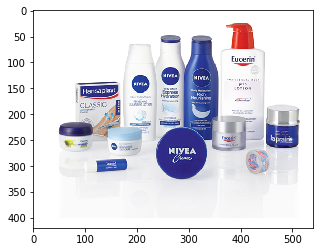

In [14]:
box = (400, 80, img.width, 500) # left, upper, right, and lower pixel coordinate
img_crop = img.crop(box=box)
plt.imshow(img_crop) 

***
> __Challenge: Write a function called `image_crop`. The function should crop the image by a given ratio.__
<img src="./_img/resize_image.png"  width="600px">

In [15]:
def image_crop(img, ratio=1):
    '''
    Function crop a PIL image opject by a given ration 0 to 1.
    : img: PIL image object
    : ratio: float between 0 and 1
    : returns: a cropped PIL image object
    '''
    assert ratio > 0, print("Warning: Ratio shall be greater than 0")
    assert ratio <= 1, print("Warning: Ratio shall be lower than 1")
    
    center = (img.width // 2, img.height //2)
    upper_left_x = None                  # your code here 
    upper_left_y = None                  # your code here 
    lower_right_x = None                 # your code here 
    lower_right_y = None                 # your code here 
    
    # Checking if all None's have been replaced by actual code 
    if any(x is None for x in [upper_left_x, upper_left_y, lower_right_x, lower_right_y]):
        print("Keep improving your code ...\n")
        return img
    else:
        return img.crop(box=(upper_left_x, upper_left_y, lower_right_x, lower_right_y))

_If you did not manage to compete the task feel free to look at a possible soultion by uncommenting the next code cell. Do not forget to run the cell twice!_

In [16]:
# %load ../src/_solutions/image_crop.py

__Apply the function__

Keep improving your code ...

Original: (940, 529), Cropped: (940, 529)


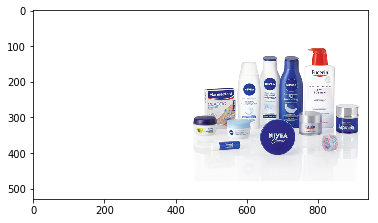

In [17]:
cropped_by_ratio = image_crop(img, ratio=0.5)
print(f'Original: {img.size}, Cropped: {cropped_by_ratio.size}')
plt.imshow(cropped_by_ratio);

***

### Filters

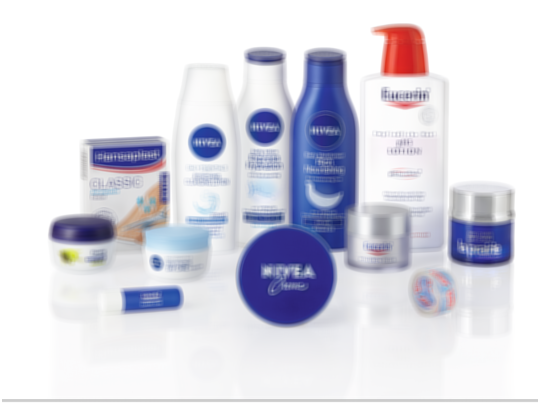

In [18]:
from PIL import ImageFilter

# Blur the input image using the filter ImageFilter.BLUR
img_crop.filter(filter=ImageFilter.BLUR)

### Resize

cropped: (540, 420), resized: (270, 210)


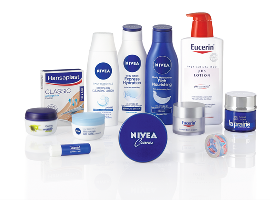

In [19]:
(width, height) = (img_crop.width // 2, img_crop.height // 2)

#PIL.Image.NEAREST # default
#PIL.Image.BOX, PIL.Image.BILINEAR, PIL.Image.HAMMING, PIL.Image.BICUBIC or PIL.Image.LANCZOS.
img_resized = img_crop.resize((width, height))
print(f'cropped: {img_crop.size}, resized: {img_resized.size}')
img_resized

### Rotate

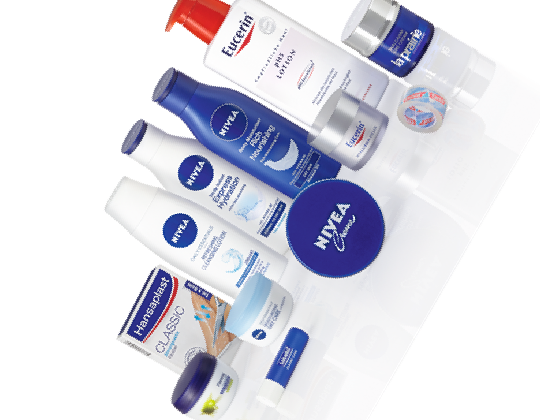

In [20]:
# Rotate the image by 60 degrees counter clockwise
theta = 60
# Angle is in degrees counter clockwise
img_crop.rotate(angle=theta)

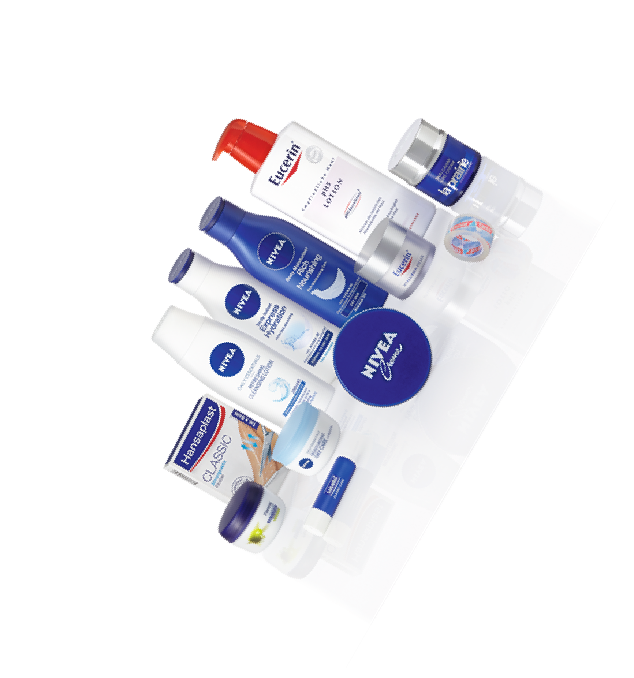

In [21]:
img_crop.rotate(angle=theta, expand=True)

### Saving to disk

In [22]:
fp = Path('../data/images/bs_cropped.png')
img_crop.save(fp)

In [23]:
fp.exists()

True

## Image enhancments

In [24]:
from PIL import ImageEnhance

### Sharpness

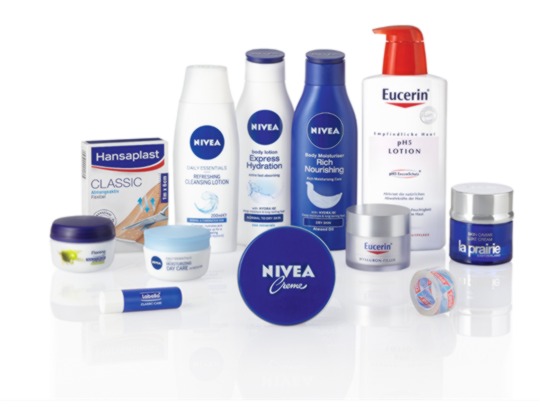

In [25]:
enhancer = ImageEnhance.Sharpness(img_crop)
enhancer.enhance(0.3)

### Color

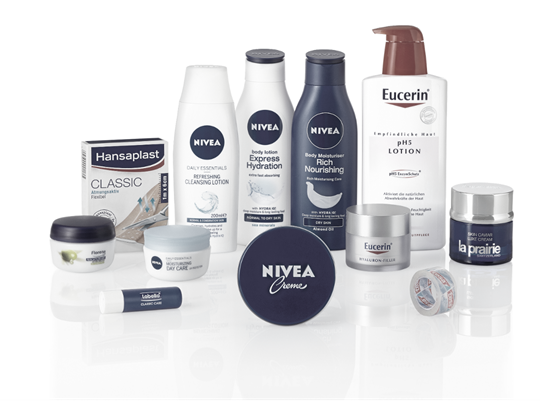

In [26]:
enhancer = ImageEnhance.Color(img_crop)
enhancer.enhance(0.25)

### Contrast

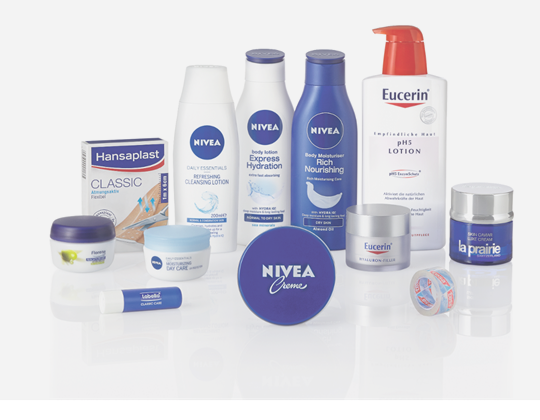

In [27]:
enhancer = ImageEnhance.Contrast(img_crop)
enhancer.enhance(0.75)

### Brightness

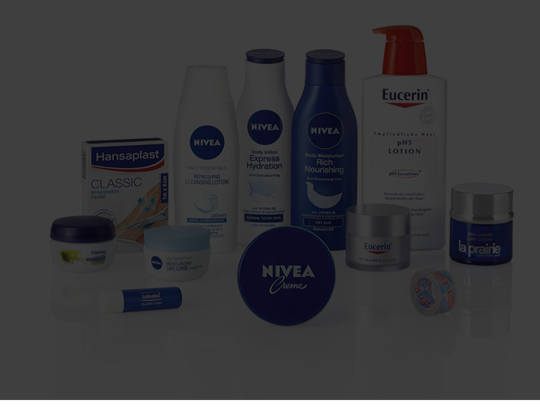

In [28]:
enhancer = ImageEnhance.Brightness(img_crop)
enhancer.enhance(0.25)

***
> __Challenge: Write a function called `image_process`. Use the function to apply a number of image processing steps to any image provided to the function.__

In [29]:
def image_process(img):
    '''
    Function to apply a series of image processing and enhancement steps on a image
    : img: a PIL image object
    : return: a copy of a processed/enhanced PIL image object
    '''
    # your code here ...
    return img.copy() # retruns a copy

_If you did not manage to compete the task feel free to look at a possible soultion by uncommenting the next code cell. Do not forget to run the cell twice!_

In [30]:
# %load ../src/_solutions/image_process.py

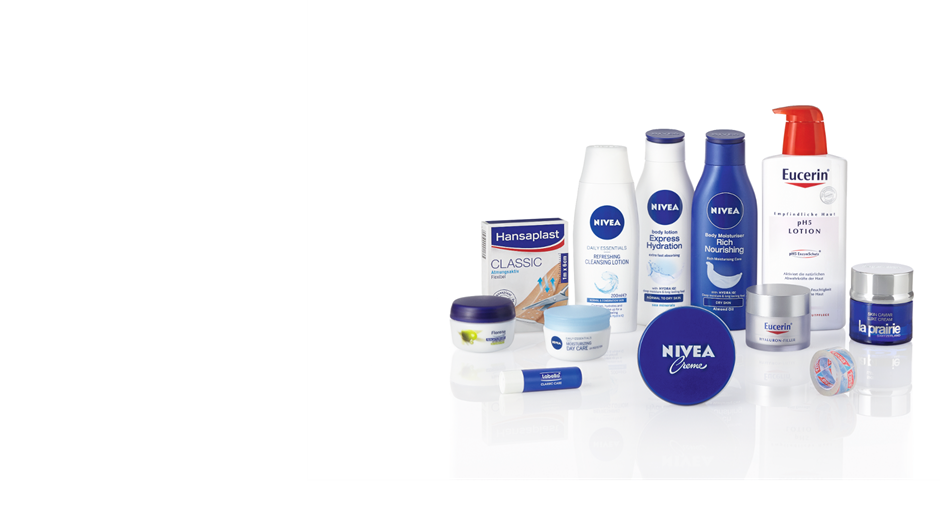

In [31]:
image_process(img)

## Expand to batch processing

In [32]:
paths = Path(f'../data/images/{search_term}/').glob('*.png')
out_path = Path('../data/images/processed/')
for path in paths:
    print(f'Processing {path} ...')
    try:
        img = Image.open(path) 
        processed = image_process(img)
        fp = out_path.joinpath(path.name)
        processed.save(fp)
    except Exception as e:
        print(f'\nWarning {e}. Image {path.name} is excluded!\n')

Processing ../data/images/beiersdorf/8.beiersdorf.png ...
Processing ../data/images/beiersdorf/3.Beiersdorf-skin-stories-logo-teaser-2019.png ...
Processing ../data/images/beiersdorf/13.Strong-Brands-Homestage-Beiersdorf.png ...
Processing ../data/images/beiersdorf/9.Beiersdorf-good-logo.png ...
Processing ../data/images/beiersdorf/1.Product-Range-Large-Stage-Teaser.png ...
Processing ../data/images/beiersdorf/4.Beiersdorf-Weltkarte-Beiersdorf.png ...
Processing ../data/images/beiersdorf/15.2000px-Beiersdorf_CI_%28white_on_blue%29.svg.png ...
Processing ../data/images/beiersdorf/7.1280px-Beiersdorf.svg.png ...
Processing ../data/images/beiersdorf/12.Sortiment-1880x1058-Beiersdorf.png ...
Processing ../data/images/beiersdorf/5.Beiersdorf-cent-initative-2019.png ...
Processing ../data/images/beiersdorf/14.Beiersdorf-stefan-de-loecker-und-christian-dahl.png ...
Processing ../data/images/beiersdorf/11.Beiersdorf-Factsheet-2018-de.png ...
Processing ../data/images/beiersdorf/2.Product-Range

***